数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   地区           36 non-null     object 
 1   年份           36 non-null     int64  
 2   国内生产总值       36 non-null     float64
 3   第一产业增加值      36 non-null     float64
 4   第二产业增加值      36 non-null     float64
 5   第三产业增加值      36 non-null     float64
 6   社会商品零售总额     36 non-null     float64
 7   货物进出口总额      36 non-null     float64
 8   年末总人口        36 non-null     float64
 9   在岗职工平均工资     36 non-null     int64  
 10  普通高等学校在校学生数  36 non-null     float64
 11  医院、卫生院数      36 non-null     int64  
 12  房地产开发投资额     35 non-null     float64
dtypes: float64(9), int64(3), object(1)
memory usage: 3.8+ KB
None

数据前5行：
     地区    年份    国内生产总值  第一产业增加值  第二产业增加值   第三产业增加值  社会商品零售总额    货物进出口总额  \
0    北京  2015  23014.59   140.21  4542.64  18331.74   10338.0  319416.16   
1    天津  2015  16538.19   208.82

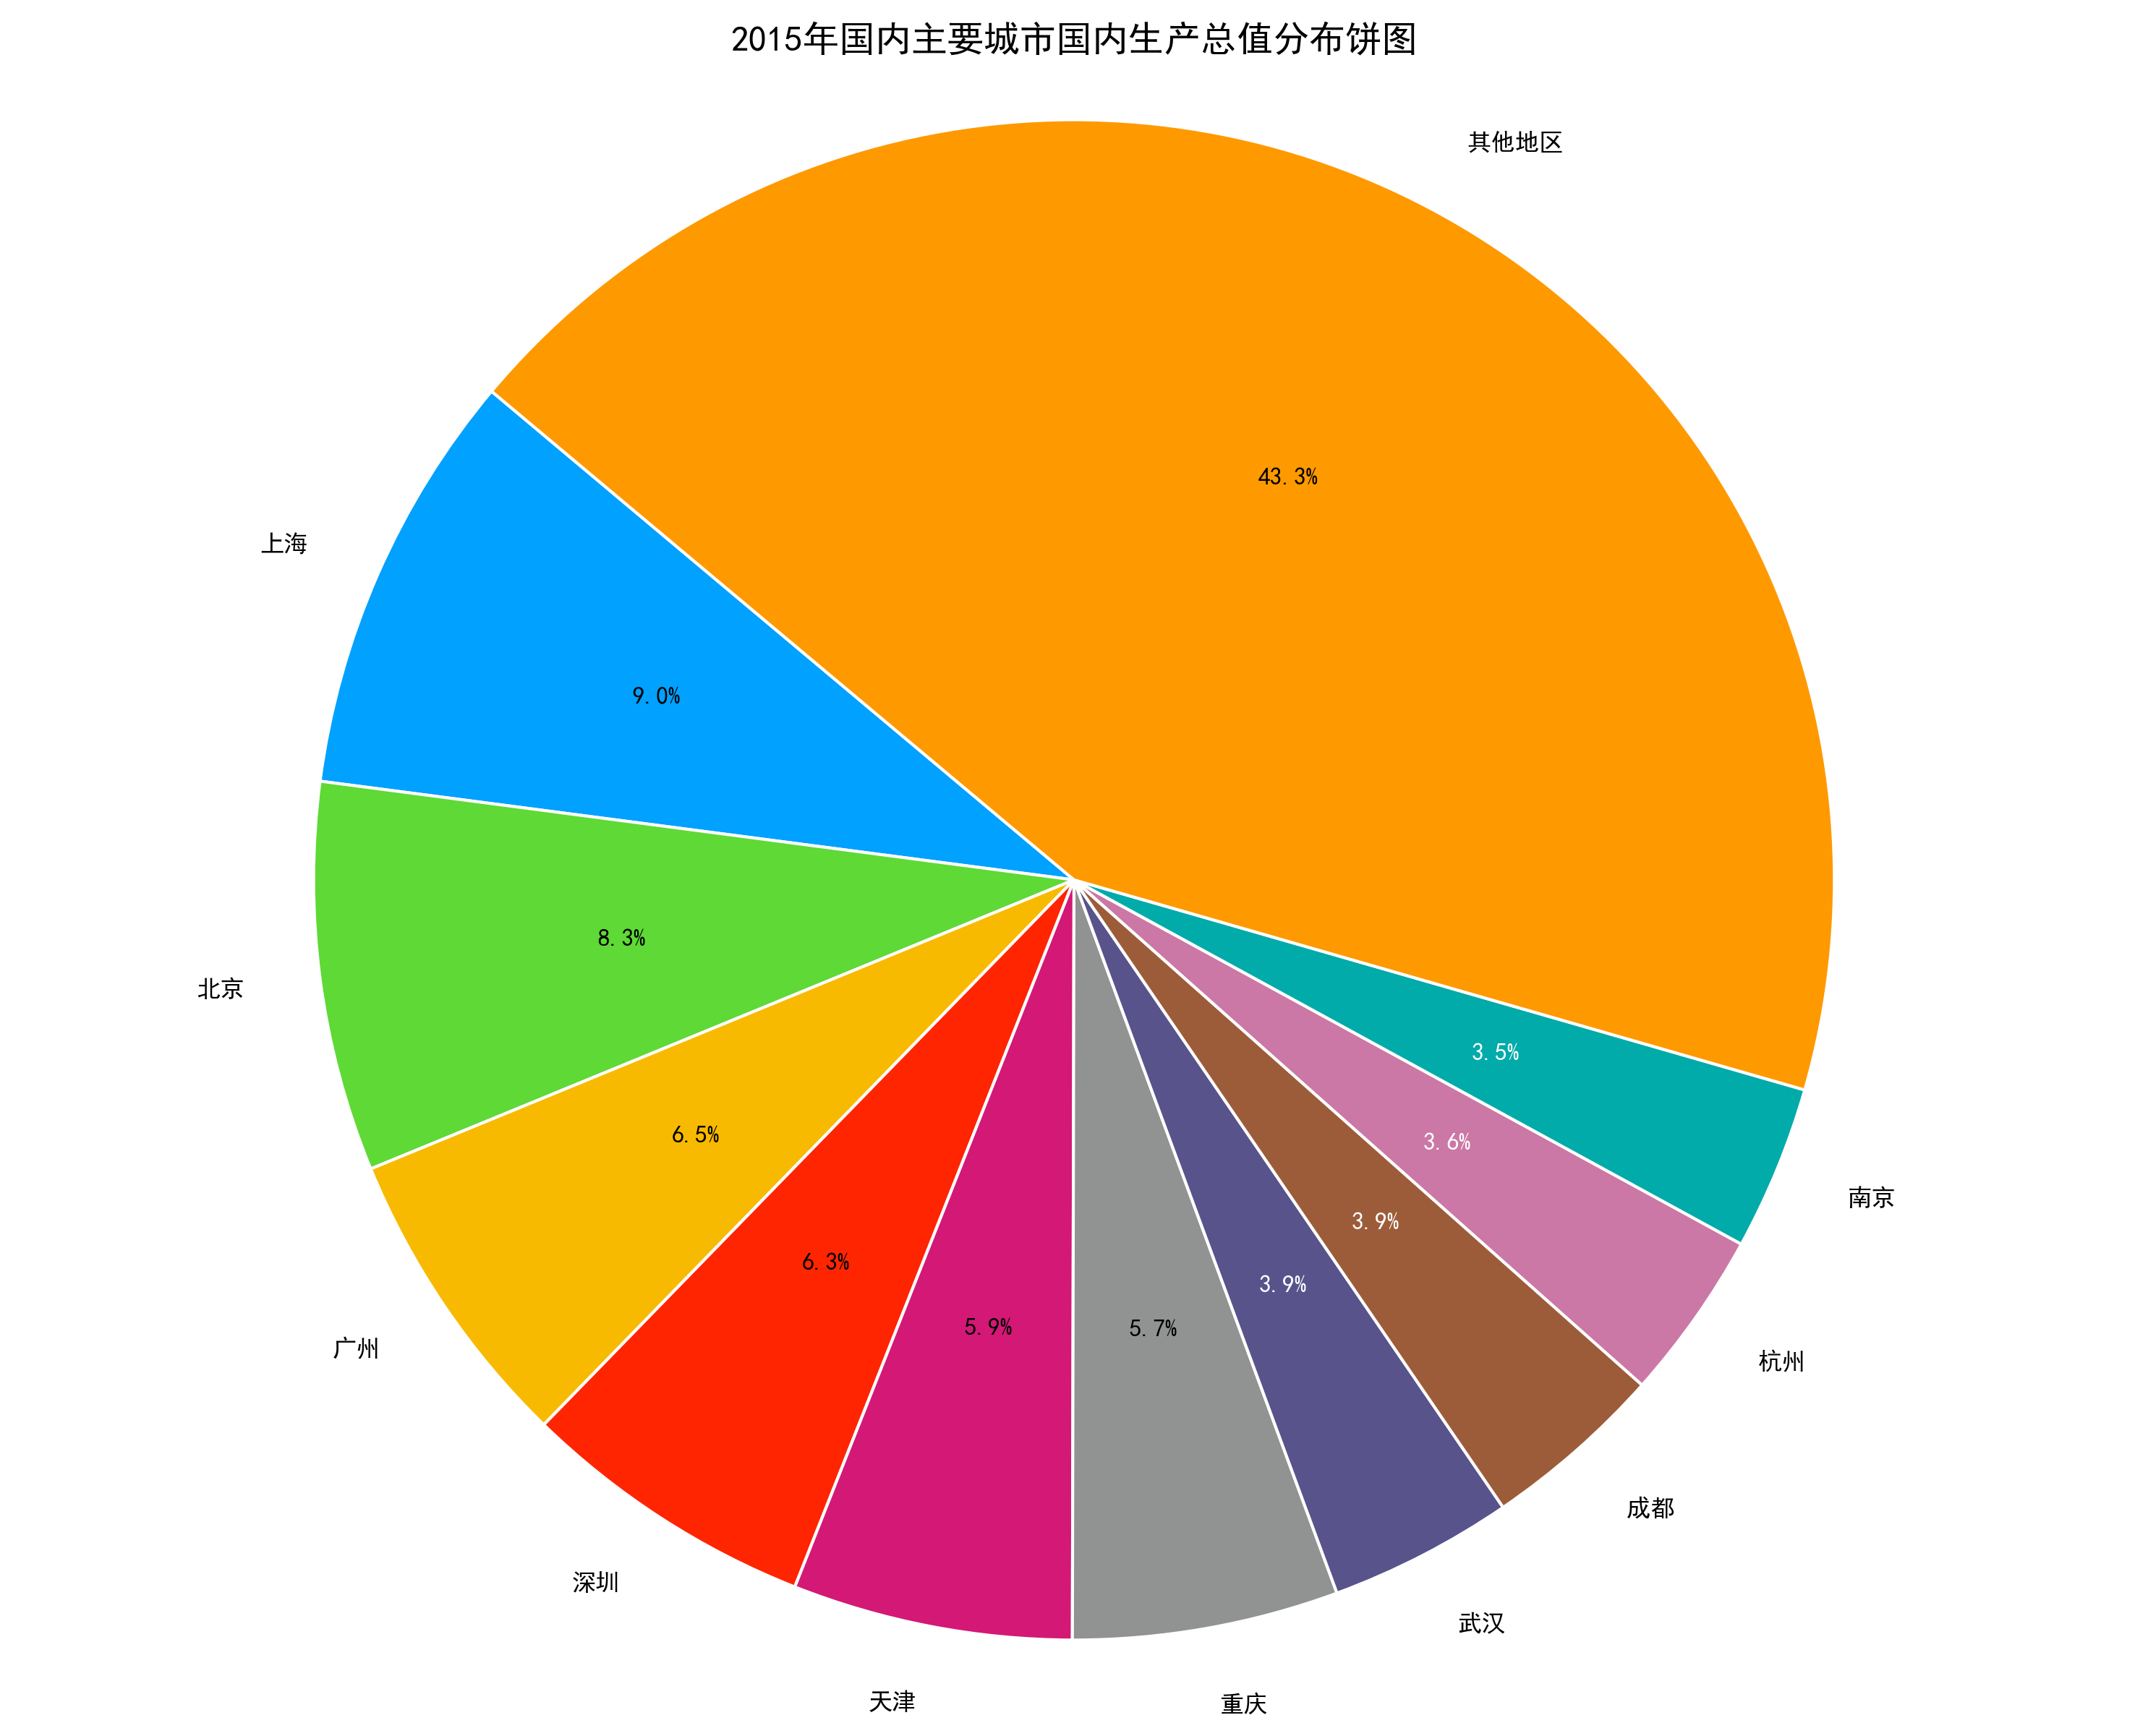


各地区GDP占比：
上海: 9.0%
北京: 8.3%
广州: 6.5%
深圳: 6.3%
天津: 5.9%
重庆: 5.7%
武汉: 3.9%
成都: 3.9%
杭州: 3.6%
南京: 3.5%
其他地区: 43.3%


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# ------------------- 关键修改：使用Windows系统自带中文字体 -------------------
# 方法1：指定系统中存在的中文字体（Windows通用方案）
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']

# 方法2：显式指定字体文件路径（适用于自定义字体）
# font_path = r"C:\Windows\Fonts\simhei.ttf"  # SimHei字体路径
# font = FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font.get_family()

# 确保负号正常显示
plt.rcParams['axes.unicode_minus'] = False

# 文件路径
file_path = r"C:\Users\HONOR\Desktop\2015年国内主要城市年度数据.csv"

try:
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 查看数据基本信息
    print("数据基本信息：")
    print(df.info())
    
    # 查看数据前几行
    print("\n数据前5行：")
    print(df.head())
    
    # 确保"国内生产总值"和"地区"列存在且数据类型正确
    if "国内生产总值" in df.columns and "地区" in df.columns:
        # 转换GDP数据为数值型
        df["国内生产总值"] = pd.to_numeric(df["国内生产总值"], errors='coerce')
        
        # 过滤掉异常值和GDP为0的城市（可选）
        valid_data = df[~df["国内生产总值"].isna() & (df["国内生产总值"] > 0)]
        
        if len(valid_data) == 0:
            print("错误：没有有效的GDP数据可供绘图。")
        else:
            # 按地区分组并计算GDP总和
            gdp_by_region = valid_data.groupby("地区")["国内生产总值"].sum()
            
            # 为了饼图可读性，只显示GDP占比前10的地区（可选）
            if len(gdp_by_region) > 10:
                # 按GDP排序并取前10
                top_regions = gdp_by_region.nlargest(10)
                # 计算"其他"地区的总和
                other_gdp = gdp_by_region.sum() - top_regions.sum()
                top_regions["其他地区"] = other_gdp
                gdp_by_region = top_regions
            
            # 计算各地区GDP占比
            total_gdp = gdp_by_region.sum()
            gdp_percentage = (gdp_by_region / total_gdp * 100).round(1)
            
            # 定义颜色列表（使用不同饱和度的蓝色系）
            colors = ['#00A1FF', '#5ed935', '#f8ba00', '#ff2501', '#d31876', '#919292', 
                     '#58538b', '#9d5c39', '#cb78a6', '#00aba9', '#ff9900', '#5s538b']
            
            # 绘制饼图
            plt.figure(figsize=(10, 8))
            
            # 绘制主饼图
            wedges, texts, autotexts = plt.pie(
                gdp_by_region, 
                labels=gdp_by_region.index, 
                autopct='%1.1f%%', 
                startangle=140,
                colors=colors,
                wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                textprops={'fontsize': 8}
            )
            
            # 调整百分比文本颜色为白色（如果背景色较深）
            for i, autotext in enumerate(autotexts):
                if gdp_percentage.iloc[i] < 5:  # 小比例标签使用白色
                    autotext.set_color('white')
            
            # 添加标题
            plt.title('2015年国内主要城市国内生产总值分布饼图')
            
            # 确保饼图是圆形
            plt.axis('equal')  # 保证饼图是圆形
            
            # 显示图形
            plt.tight_layout()
            plt.show()
            
            # 打印各地区GDP占比
            print("\n各地区GDP占比：")
            for region, percent in gdp_percentage.items():
                print(f"{region}: {percent}%")
                
    else:
        print("错误：数据中没有找到'国内生产总值'或'地区'列，请检查列名是否正确。")
        print("可用列名：", df.columns.tolist())

except FileNotFoundError:
    print(f"错误：文件 {file_path} 不存在，请检查文件路径是否正确。")
except Exception as e:
    print(f"处理数据时发生错误：{str(e)}")

成功读取文件: C:\Users\HONOR\Desktop\2015年国内主要城市年度数据.csv，数据行数: 36
成功读取文件: C:\Users\HONOR\Desktop\2016年国内主要城市年度数据.csv，数据行数: 36
成功读取文件: C:\Users\HONOR\Desktop\2017年国内主要城市年度数据.csv，数据行数: 36
合并后数据总行数: 108
使用Sturges规则计算的bins数量: 7


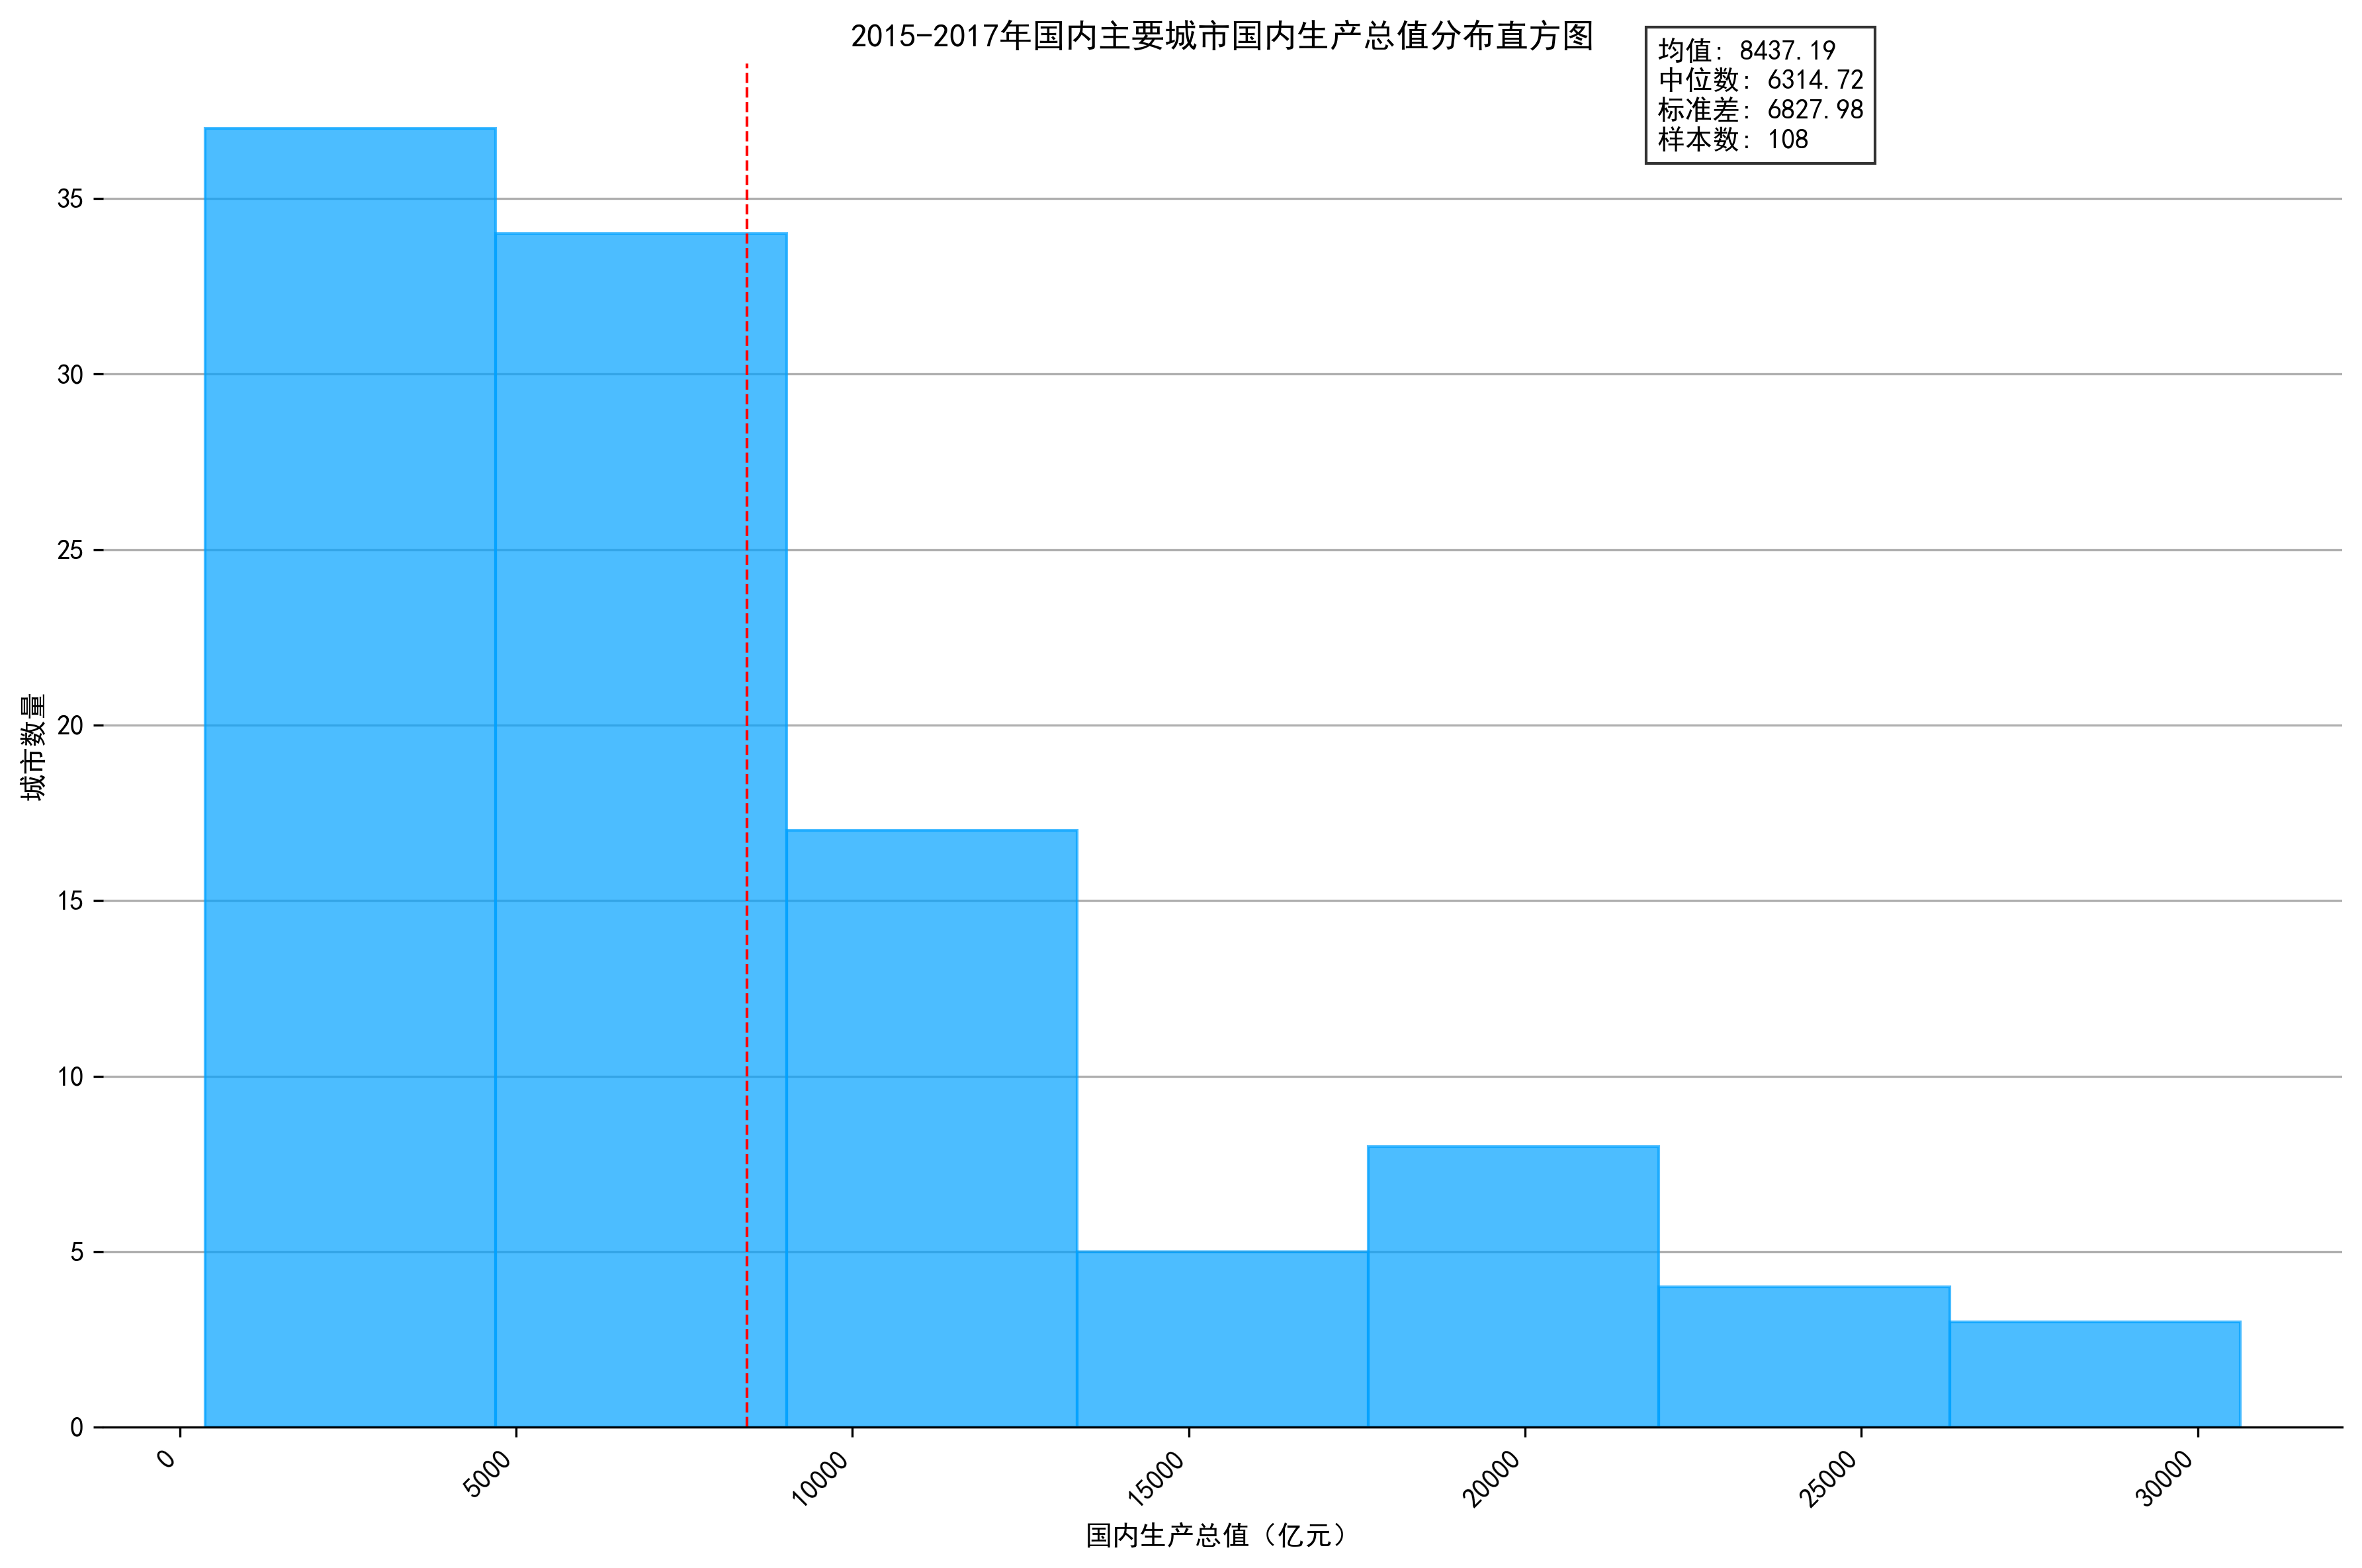

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# ------------------- 优化中文字体配置 -------------------
# 方法1：指定系统中存在的中文字体（Windows通用方案）
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']

# 方法2：显式指定字体文件路径（适合自定义字体）
# from matplotlib.font_manager import FontProperties
# font_path = r"C:\Windows\Fonts\simhei.ttf"  # SimHei字体路径
# font = FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font.get_family()

# 确保负号正常显示
plt.rcParams['axes.unicode_minus'] = False

# 文件路径列表
file_paths = [
    r"C:\Users\HONOR\Desktop\2015年国内主要城市年度数据.csv",
    r"C:\Users\HONOR\Desktop\2016年国内主要城市年度数据.csv",
    r"C:\Users\HONOR\Desktop\2017年国内主要城市年度数据.csv"
]

def load_and_merge_data(file_paths):
    """读取并合并多个CSV文件的数据"""
    dfs = []
    for path in file_paths:
        try:
            if not os.path.exists(path):
                print(f"警告：文件 {path} 不存在，跳过该文件")
                continue
                
            df = pd.read_csv(path)
            print(f"成功读取文件: {path}，数据行数: {len(df)}")
            
            if "国内生产总值" not in df.columns:
                print(f"警告：文件 {path} 中没有找到'国内生产总值'列，跳过该文件")
                continue
                
            df["国内生产总值"] = pd.to_numeric(df["国内生产总值"], errors='coerce')
            df = df.dropna(subset=["国内生产总值"])
            dfs.append(df)
        except Exception as e:
            print(f"处理文件 {path} 时出错: {str(e)}")
    
    if not dfs:
        print("错误：没有成功读取任何有效数据")
        return None
    
    merged_df = pd.concat(dfs, ignore_index=True)
    print(f"合并后数据总行数: {len(merged_df)}")
    return merged_df

def plot_gdp_histogram(data, bins=None):
    """绘制GDP直方图"""
    if data is None or len(data) == 0:
        print("错误：没有数据可供绘图")
        return
    
    gdp_data = data["国内生产总值"]
    
    if bins is None:
        num_bins = int(1 + 3.322 * np.log10(len(gdp_data)))
        print(f"使用Sturges规则计算的bins数量: {num_bins}")
    else:
        num_bins = bins
    
    plt.figure(figsize=(12, 8))
    
    plt.hist(
        gdp_data, 
        bins=num_bins, 
        color='#00A1FF', 
        edgecolor='#00A1FF', 
        alpha=0.7, 
        zorder=2
    )
    
    mean_gdp = gdp_data.mean()
    median_gdp = gdp_data.median()
    std_gdp = gdp_data.std()
    
    stats_text = f"均值: {mean_gdp:.2f}\n中位数: {median_gdp:.2f}\n标准差: {std_gdp:.2f}\n样本数: {len(gdp_data)}"
    plt.figtext(0.7, 0.9, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title('2015-2017年国内主要城市国内生产总值分布直方图')
    plt.xlabel('国内生产总值（亿元）')
    plt.ylabel('城市数量')
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    plt.grid(axis='y', zorder=1)
    plt.xticks(rotation=45, ha='right')
    
    plt.axvline(mean_gdp, color='r', linestyle='dashed', linewidth=1)
    
    plt.tight_layout()
    plt.show()

def main():
    merged_data = load_and_merge_data(file_paths)
    if merged_data is not None:
        plot_gdp_histogram(merged_data)

if __name__ == "__main__":
    main()